In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
data = pd.read_csv("TS.csv",sep=";") #i called the csv file TS for abreviation 
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


## data cleaning

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [28]:
data.drop('Cabin',axis=1,inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [29]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
from sklearn.tree import DecisionTreeClassifier
data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
x = data[['Pclass', 'Sex','Age','Fare']] #features
y = data[['Survived']] #target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=30)  #splitting data with test size of 25%
clf = tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7802690582959642


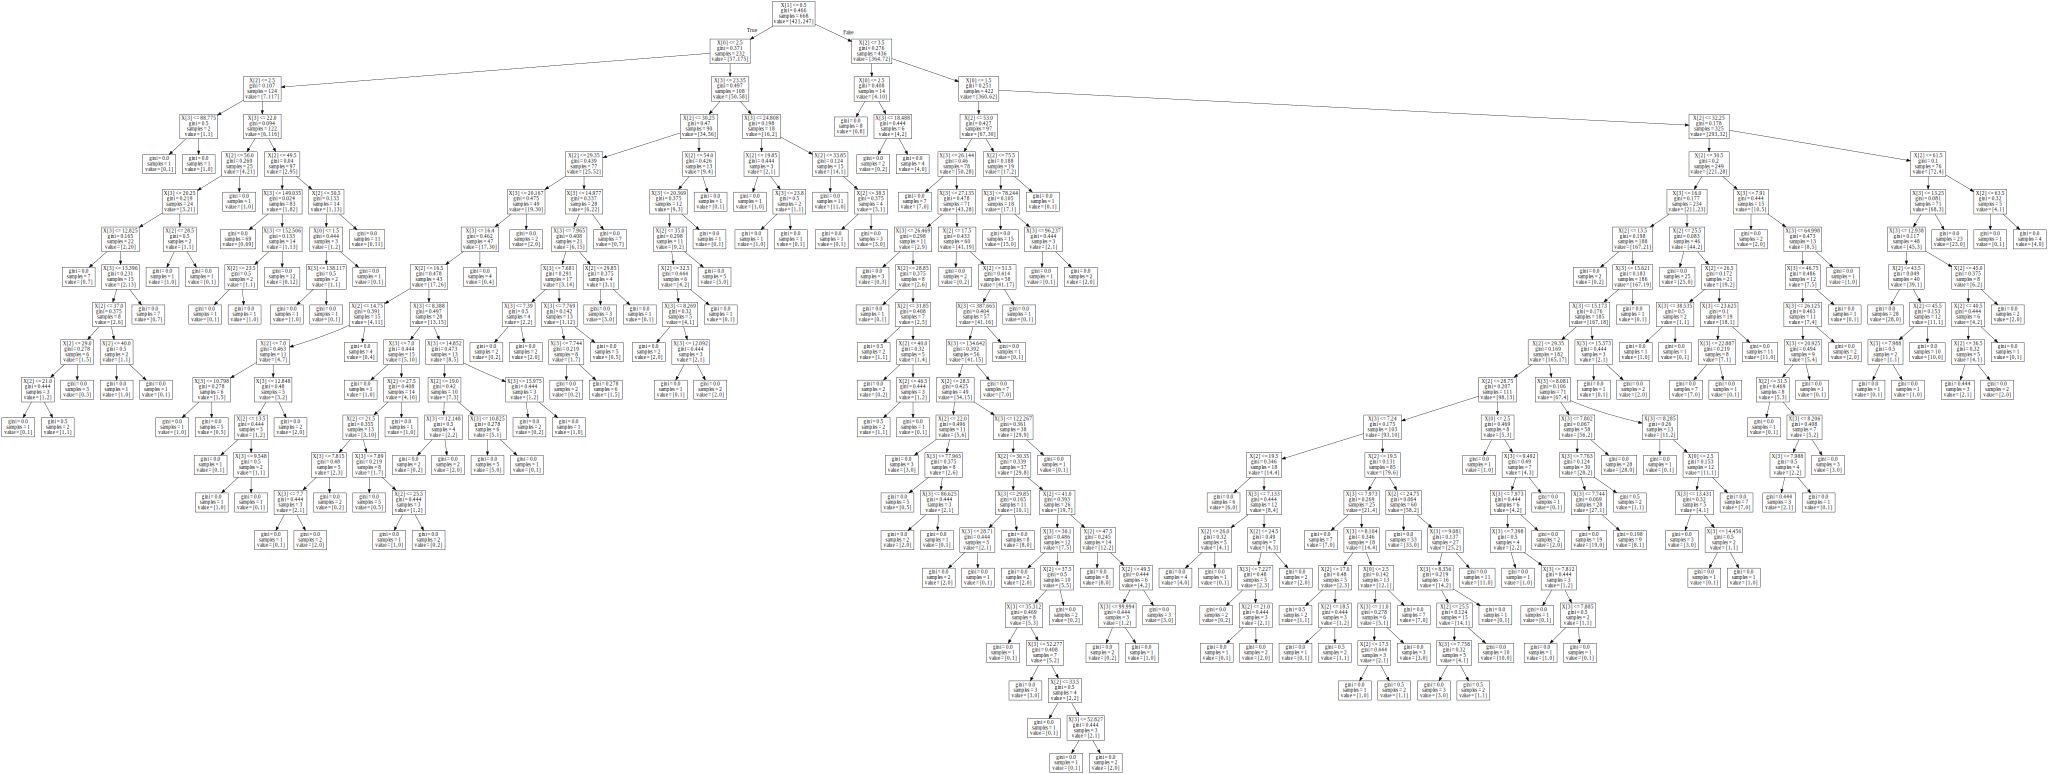

In [31]:
dot_data = tree.export_graphviz(clf,out_file=None)
                           
graph = graphviz.Source(dot_data)
graph.render("data")
graph

In [32]:
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

In [33]:
#predict3 = dtree.predict(x_train)
predict4 = dtree.predict(x_test)
score2 = dtree.score(x_test, y_test)
score2

0.7757847533632287

In [34]:
predict3 = dtree.predict(x_train)
score3 = dtree.score(x_train, y_train)
score3

0.8203592814371258

## changing parameters

In [35]:
#Now extract the parameters
parameters_dt = clf.get_params()

#Now change the parameter you want
parameters_dt['max_depth'] = 3
parameters_dt['max_leaf_nodes']=5
parameters_dt['min_samples_leaf']=3

#Now create a new classifier
new_clf = tree.DecisionTreeClassifier(**parameters_dt)

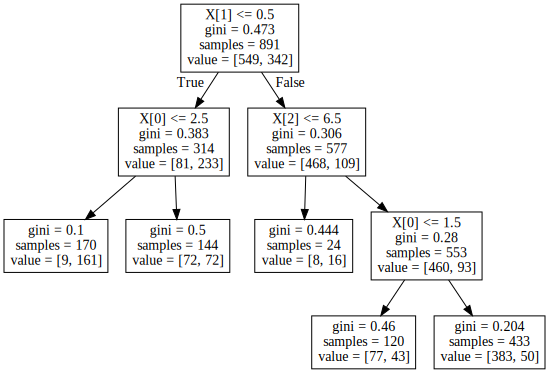

In [14]:
model = new_clf.fit(x, y)
new_data = tree.export_graphviz(new_clf,out_file=None)
graph = graphviz.Source(new_data)
graph.render("new_data")
graph

In [15]:
y_p = new_clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_p))

Accuracy: 0.7802690582959642


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
x=data[['Pclass','Sex','Age','Fare']]
y=data[['Survived']]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=30)
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Acuracy:", metrics.accuracy_score(y_test, y_pred))

Acuracy: 0.7937219730941704


<ipython-input-24-ae5d417d0e6a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
